In [123]:
# -*- coding: utf-8 -*-
#@author: Renan Silva
#@Github: https://github.com/rfelipesilva
#@Python 3.8.7

In [532]:
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Análise - deputados federais
Usando a base eleições da base dos dados para analisar diferença entre generos nas eleições brasileiras de 1990 até os dias de hoje (Fevereiro, 2022) para cargos de deputados(a) federais.

Vale ressaltar que o escopo dessa analise foca somente em analisar a informação de gênero dos cadidatos, não levando em consideração raça, situação da candidatura, ou instrução.

- Acesso aos dados
- Exploração dos dados
- Fortamação dos dados
- Visualização dos dados - Responder perguntas:
    - Qual o total de candidaturas e candidaturas eleitas por homens e mulheres?
    - Qual a distribuição de candidaturas por gênero ao longo dos anos?
    - Qual a distribuição de candidaturas por gênero por partido?
- Repostas que podemos extrair:
    - Ano que tivemos recorde de candidatas mulheres
    - Partido que mais indicou mulheres como candidatas
- Referências

## Acesso aos dados

Aqui estamos usando duas tabelas do dataset de eleições brasileiras da brilhante [Base dos Dados](https://basedosdados.org/).

Para saber como criar seu token e como acessar essa e outras tabelas/conjunto de dados, basta acessar o site.

In [531]:
df_candidates = bd.read_sql(query="SELECT * FROM basedosdados.br_tse_eleicoes.candidatos WHERE ano IN (1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018)",
                            billing_project_id='<YOUR PROJECT ID>')
df_candidates.head()

Downloading: 100%|█████████████████████████████████████████████████████████| 138939/138939 [01:28<00:00, 1563.72rows/s]


,ano,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,...,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca
0,1994,eleicao ordinaria,MA,None,None,None,None,10011201104,None,41127,...,1954-12-08,40.0,masculino,None,None,None,None,None,None,None
1,1994,eleicao ordinaria,MA,None,None,None,None,1002531180,None,6518,...,1957-07-03,37.0,masculino,None,None,None,None,None,None,None
2,1994,eleicao ordinaria,MA,None,None,None,None,10043961198,None,41205,...,1953-09-19,41.0,masculino,None,None,None,None,None,None,None
3,1994,eleicao ordinaria,MA,None,None,None,None,10044561163,None,22211,...,1946-08-08,48.0,masculino,None,None,None,None,None,None,None
4,1994,eleicao ordinaria,MA,None,None,None,None,10084341171,None,22120,...,1963-04-21,31.0,masculino,None,None,None,None,None,None,None


In [145]:
df_result_candidates = bd.read_sql(query="SELECT * FROM basedosdados.br_tse_eleicoes.resultados_candidato WHERE ano IN (1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018)",
                            billing_project_id='<YOUR PROJECT ID>')
df_result_candidates.head()

Downloading: 100%|█████████████████████████████████████████████████████████| 120515/120515 [00:23<00:00, 5153.68rows/s]


,ano,turno,tipo_eleicao,sigla_uf,id_municipio,id_municipio_tse,cargo,sigla_partido,numero_candidato,sequencial_candidato,id_candidato_bd,resultado,votos
0,1994,1,eleicao ordinaria,None,None,None,presidente,PDT,12,None,None,nao eleito,1039265
1,1994,1,eleicao ordinaria,None,None,None,presidente,PMDB,15,None,None,nao eleito,1985369
2,1994,1,eleicao ordinaria,None,None,None,presidente,PPR,11,None,None,nao eleito,1307469
3,1994,1,eleicao ordinaria,None,None,None,presidente,PRN,36,None,None,nao eleito,214689
4,1994,1,eleicao ordinaria,None,None,None,presidente,PRONA,56,None,None,nao eleito,2737402


***

## Exploração dos dados
Para começar, vamos definir quais informações(colunas) vamos utilizar de cada dataframe e entender como essas informações estão em relação a complitude do dado (valores ausentes):
- df_candidate -> desse dataframe iremos utilizar as colunas:
    - ano
    - id_candidato_bd
    - sigla_partido
    - cargo
    - genero
    
- df_result_candidates -> desse dataframe iremos utilizar as seguintes colunas:
    - id_candidato_bd
    - resultado
    - votos
    - cargo
    - ano

Antes de entender valores nulos ou ausentes, vamos filtrar somente as colunas que vamos trabalhar e então explorar valores nulos por coluna no dataframe **df_candidate**:

In [146]:
df_candidates = df_candidates[['ano', 'id_candidato_bd', 'sigla_partido', 'cargo', 'genero']] #FILTRANDO COLUNAS
df_candidates['genero'].fillna('não informado', inplace=True) #PREENCHENDO VALORES NULLOS COMO "não informado" NA COLUNA DE "genero"
df_candidates['cargo'].fillna('não informado', inplace=True) #PREENCHENDO VALORES NULLOS COMO "não informado" NA COLUNA DE "cargo"

As colunas ***cargo*** e ***genero*** do dataframe **df_candidates** são as que receberão atenção agora, portanto podemos ignorar as outras colunas (serão usadas depois para juntar as tabelas).

In [147]:
df_candidates.cargo.value_counts() #VALORES TOTAIS POR CARGO

deputado estadual      89059
deputado federal       37268
deputado distrital      4894
senador                 1711
governador              1213
vice-governador         1194
2º suplente senador     1149
1º suplente senador     1114
2º suplente              610
1º suplente              596
presidente                74
vice-presidente           57
Name: cargo, dtype: int64

In [150]:
df_candidates.genero.value_counts() #VALORES TOTAIS POR GÊNERO

masculino        108231
feminino          30493
não informado       215
Name: genero, dtype: int64

Já temos valores para analisar, mas podemos facilitar o entendimento através de simples gráficos de distribuição:

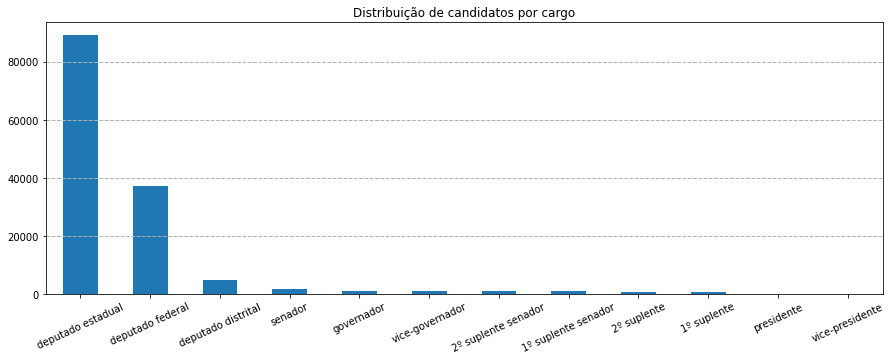

In [151]:
df_candidates.cargo.value_counts().plot(kind='bar', figsize=(15,5)).grid(axis='y', linestyle='--', linewidth=1)
plt.xticks(rotation=25)
plt.title('Distribuição de candidatos por cargo')
plt.show()

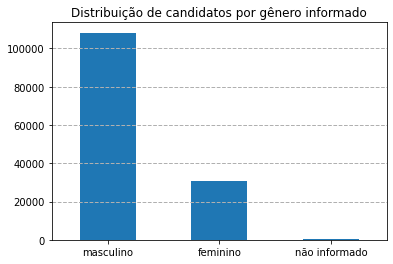

In [152]:
df_candidates.genero.value_counts().plot(kind='bar').grid(axis='y', linestyle='--', linewidth=1)
plt.xticks(rotation=0)
plt.title('Distribuição de candidatos por gênero informado')
plt.show()

Sobre os dataframes:
- df_candidates:
    - o dataset trás dados para de todos os cargos como *Presidente*, *Deputado federal* e etc. No nosso caso vamos trabalhar somente com dados de **Deputado Federal**
    - o dataset contém valores nulos quando olhamos para a variável **gênero** (porém já foram tratados do nosso lado)

Vemos que, com simples gráficos não tão elaborados, agora temos uma percepção melhor dos dados do dataframe **df_cadidates** e principalmente das variáveis que vamos trabalhar.

Vamos fazer a mesma coisa mas agora para o dataframe **df_result_candidates**:

In [153]:
df_result_candidates = df_result_candidates[['ano', 'id_candidato_bd', 'resultado', 'votos', 'cargo']] #FILTRANDO COLUNAS
df_result_candidates.head()

,ano,id_candidato_bd,resultado,votos,cargo
0,1994,None,nao eleito,1039265,presidente
1,1994,None,nao eleito,1985369,presidente
2,1994,None,nao eleito,1307469,presidente
3,1994,None,nao eleito,214689,presidente
4,1994,None,nao eleito,2737402,presidente


Vemos que no dataframe **df_result_candidates** temos algunas valores nulos para o id do candidato(a), vamos aproveitar e entender se temos mais valores nulos nas outras colunas:

In [154]:
df_result_candidates.isnull().sum()

ano                   0
id_candidato_bd    6492
resultado             0
votos                 0
cargo                 0
dtype: int64

Nesse caso só temos valores nulos para a coluna **id_candidato_bd**, isso deve ser levado em consideração depois na hora de juntar informações entre os dois dataframes.

Por agora isso já basta na exploração dos dados, temos tudo que precisamos e sabemos tudo que devemos levar em consideração na análise.

***

## Formatação dos dados

Para começarmos a analisar a questão de gênero, precisamos juntar informações dos dois dataframes:
- df_candidate -> contém informação de gênero de qualquer candidato (OS DADOS ESTÃO SENDO USADOS CONFORME FORMATAÇÃO DO DATASET, NÃO FOI ALTERADO NENHUM REGISTRO DO DADO)
- df_result_candidates -> contém informações de resultados das eleições (por exemplo Votos)

Nesse momento estaremos priorizando o dataframe **df_result_candidates** já com os resultados pós eleições para depois contarmos votos.

Para juntar os dataframes, iremos utilizar como valor chave entre eles a coluna ***id_candidato_bd*** e também vamos filtrar ambos para trabalhar somente com o cargo de **Deputado Federal**, lembrando que alguns desses valores estão nulos conforme analisado durante a fase de exploração dos dados.

Vamos lidar com a junção dos dados da seguinte forma:
1. Limpar **id_candidato_bd** nulos de ambos dataframes, pois esses podem trazer mais ruídos do que ajudar a análise.
2. Filtrar somente pelo cargo deputado federal, já que ambos dataframes contém dados de todos os cargos.
3. Também vamos criar um novo dataframe com valores únicos em relação a **id_candidato_bd** e **genero**, com isso na hora de juntar as tabelas teremos um dataframe mais limpo para simular a análise.

In [190]:
#1. LIMPANDO DADOS NULOS
df_candidates = df_candidates[df_candidates['id_candidato_bd'].isnull() == False]
df_result_candidates = df_result_candidates[df_result_candidates['id_candidato_bd'].isnull() == False]

#2. FILTRANDO DADOS POR DEPUTADO(a) FEDERAL
df_congressperson = df_candidates[df_candidates['cargo'] == 'deputado federal']
df_result_congressperson = df_result_candidates[df_result_candidates['cargo'] == 'deputado federal']

#3. CRIANDO NOVO DATAFRAME COM INFORMAÇÕES UNICAS DE GENERO POR CANDIDATO(a)
df_candidates_genre = df_congressperson[['id_candidato_bd','genero']].drop_duplicates()

Agora podemos seguir com a junção das tabelas e então seguir para a visualização dos dados:

In [200]:
#JUNTANDO TABELAS PARA TRAZER INFORMAÇÃO DE GÊNERO e VOTOS
df_merged = df_result_congressperson.merge(df_candidates_genre,
                                       left_on='id_candidato_bd', 
                                       right_on='id_candidato_bd',
                                       how='left')

#BREVE VISUALIZAÇÃO DO NOVO DATAFRAME
df_merged.head()

,ano,id_candidato_bd,resultado,votos,cargo,genero
0,1998,1132763,suplente,1477,deputado federal,masculino
1,1998,1049320,eleito,7969,deputado federal,masculino
2,1998,72066,eleito por media,10011,deputado federal,feminino
3,1998,78225,eleito,10673,deputado federal,masculino
4,1998,111199,suplente,1170,deputado federal,masculino


***

# Visualização dos dados
Agora é hora de responder algumas perguntas através da visualização dos dados, vamos começar por:

### Qual o total de candidaturas e candidaturas eleitas por homens e mulheres?

In [248]:
congressperson_candidates_labels = df_merged.genero.value_counts().index
congressperson_candidates_values = df_merged.genero.value_counts().values

congressperson_elected_labels = df_merged[df_merged['resultado'] == 'eleito'].genero.value_counts().index
congressperson_elected_values = df_merged[df_merged['resultado'] == 'eleito'].genero.value_counts().values

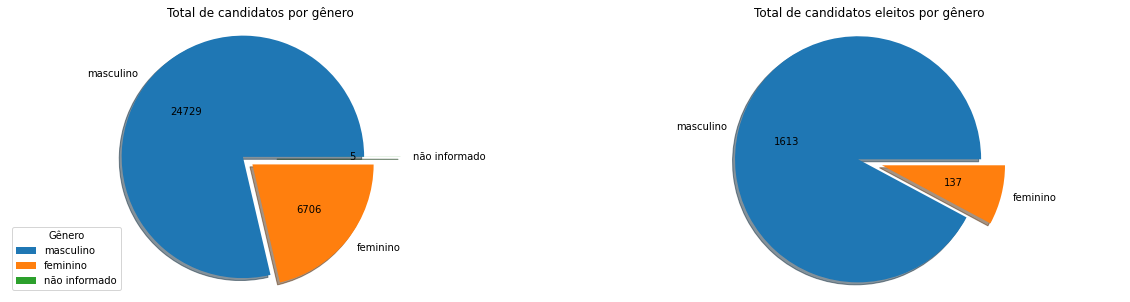

In [341]:
explode_candidates = (0, 0.1, 0.3)
explode_elected = (0, 0.2)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols= 2, figsize=(20,5))

ax1.pie(congressperson_candidates_values, explode=explode_candidates, labels=congressperson_candidates_labels, shadow=True, 
        autopct= lambda x: '{:.0f}'.format(x*congressperson_candidates_values.sum()/100))
ax1.set_title('Total de candidatos por gênero')
ax1.axis('equal')

ax2.pie(congressperson_elected_values, explode=explode_elected, labels=congressperson_elected_labels, shadow=True,
        autopct= lambda x: '{:.0f}'.format(x*congressperson_elected_values.sum()/100))
ax2.set_title('Total de candidatos eleitos por gênero')
ax2.axis('equal')

ax1.legend(title='Gênero',
           loc='lower left')

plt.show()

### Qual a porcentagem de candidaturas e candidaturas eleitas por homens e mulheres?

In [330]:
congressperson_candidates_perc_labels = df_merged.genero.value_counts(normalize=True).index
congressperson_candidates_perc_values = df_merged.genero.value_counts(normalize=True).values

congressperson_elected_perc_labels = df_merged[df_merged['resultado'] == 'eleito'].genero.value_counts(normalize=True).index
congressperson_elected_perc_values = df_merged[df_merged['resultado'] == 'eleito'].genero.value_counts(normalize=True).values

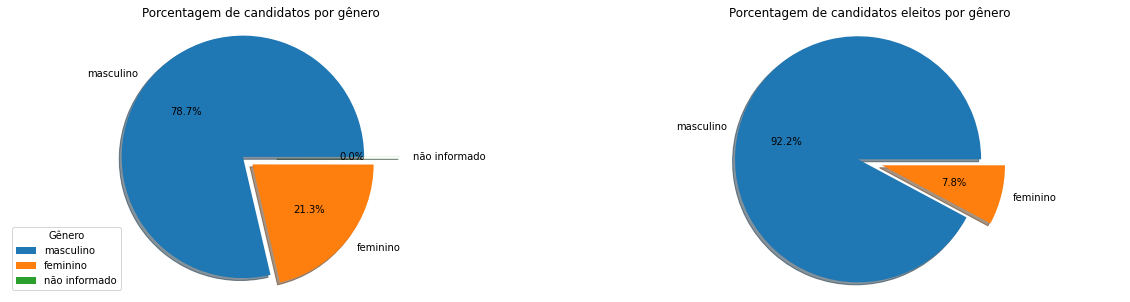

In [347]:
fig_perc, (ax1_perc, ax2_perc) = plt.subplots(nrows=1, ncols= 2, figsize=(20,5))

ax1_perc.pie(congressperson_candidates_perc_values, explode=explode_candidates, labels=congressperson_candidates_perc_labels, shadow=True, 
             autopct='%1.1f%%')
ax1_perc.set_title('Porcentagem de candidatos por gênero')
ax1_perc.axis('equal')

ax2_perc.pie(congressperson_elected_perc_values, explode=explode_elected, labels=congressperson_elected_perc_labels, shadow=True,
             autopct='%1.1f%%')
ax2_perc.set_title('Porcentagem de candidatos eleitos por gênero')
ax2_perc.axis('equal')

ax1_perc.legend(title='Gênero',
           loc='lower left')

plt.show()

### Qual a quantidade de candidaturas por gênero ao longo dos anos?

In [455]:
#FORMATANDO DF PARA PLOTAR O GRÁFICO
df_candidates_by_year = df_merged.groupby(['ano','genero']).size().reset_index(name='counts').pivot('ano','genero','counts').reset_index()[['ano','feminino','masculino',]]
#COLOCANDO VALOR 0 QUANDO FOR Null
df_candidates_by_year.fillna(0, inplace=True)

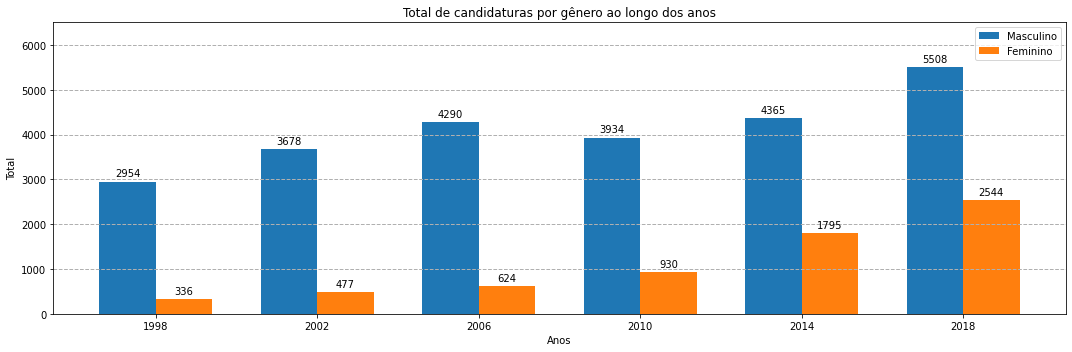

In [456]:
#DEFININDO VALORES DO GRÁFICO
labels = list(df_candidates_by_year['ano'].values)
men = list(df_candidates_by_year['masculino'].values)
women = list(df_candidates_by_year['feminino'].values)

x = np.arange(len(labels))  # LOCALIZAÇÃO DAS BARRAS
width = 0.35  # TAMANHO DAS BARRAS

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - width/2, men, width, label='Masculino')
rects2 = ax.bar(x + width/2, women, width, label='Feminino')

# FORMATANDO LEGENDA DO GRÁFICO
ax.set_ylabel('Total')
ax.set_title('Total de candidaturas por gênero ao longo dos anos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Anos')
ax.legend()

plt.grid(axis='y', linestyle='--', linewidth=1)

def autolabel(rects):
    """Coloca o valor correspondente em cima de cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 ALINHAMENTO VERTICAL
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.ylim(0, max(men)+1000)
plt.show()

### Qual a distribuição de candidaturas por gênero por partido?

In [521]:
df_candidates_by_party = df_candidates.groupby(['sigla_partido','genero']).size().reset_index(name='counts').pivot('sigla_partido','genero','counts').reset_index()[['sigla_partido','feminino','masculino',]]
#COLOCANDO VALOR 0 QUANDO FOR Null
df_candidates_by_party.fillna(0, inplace=True)

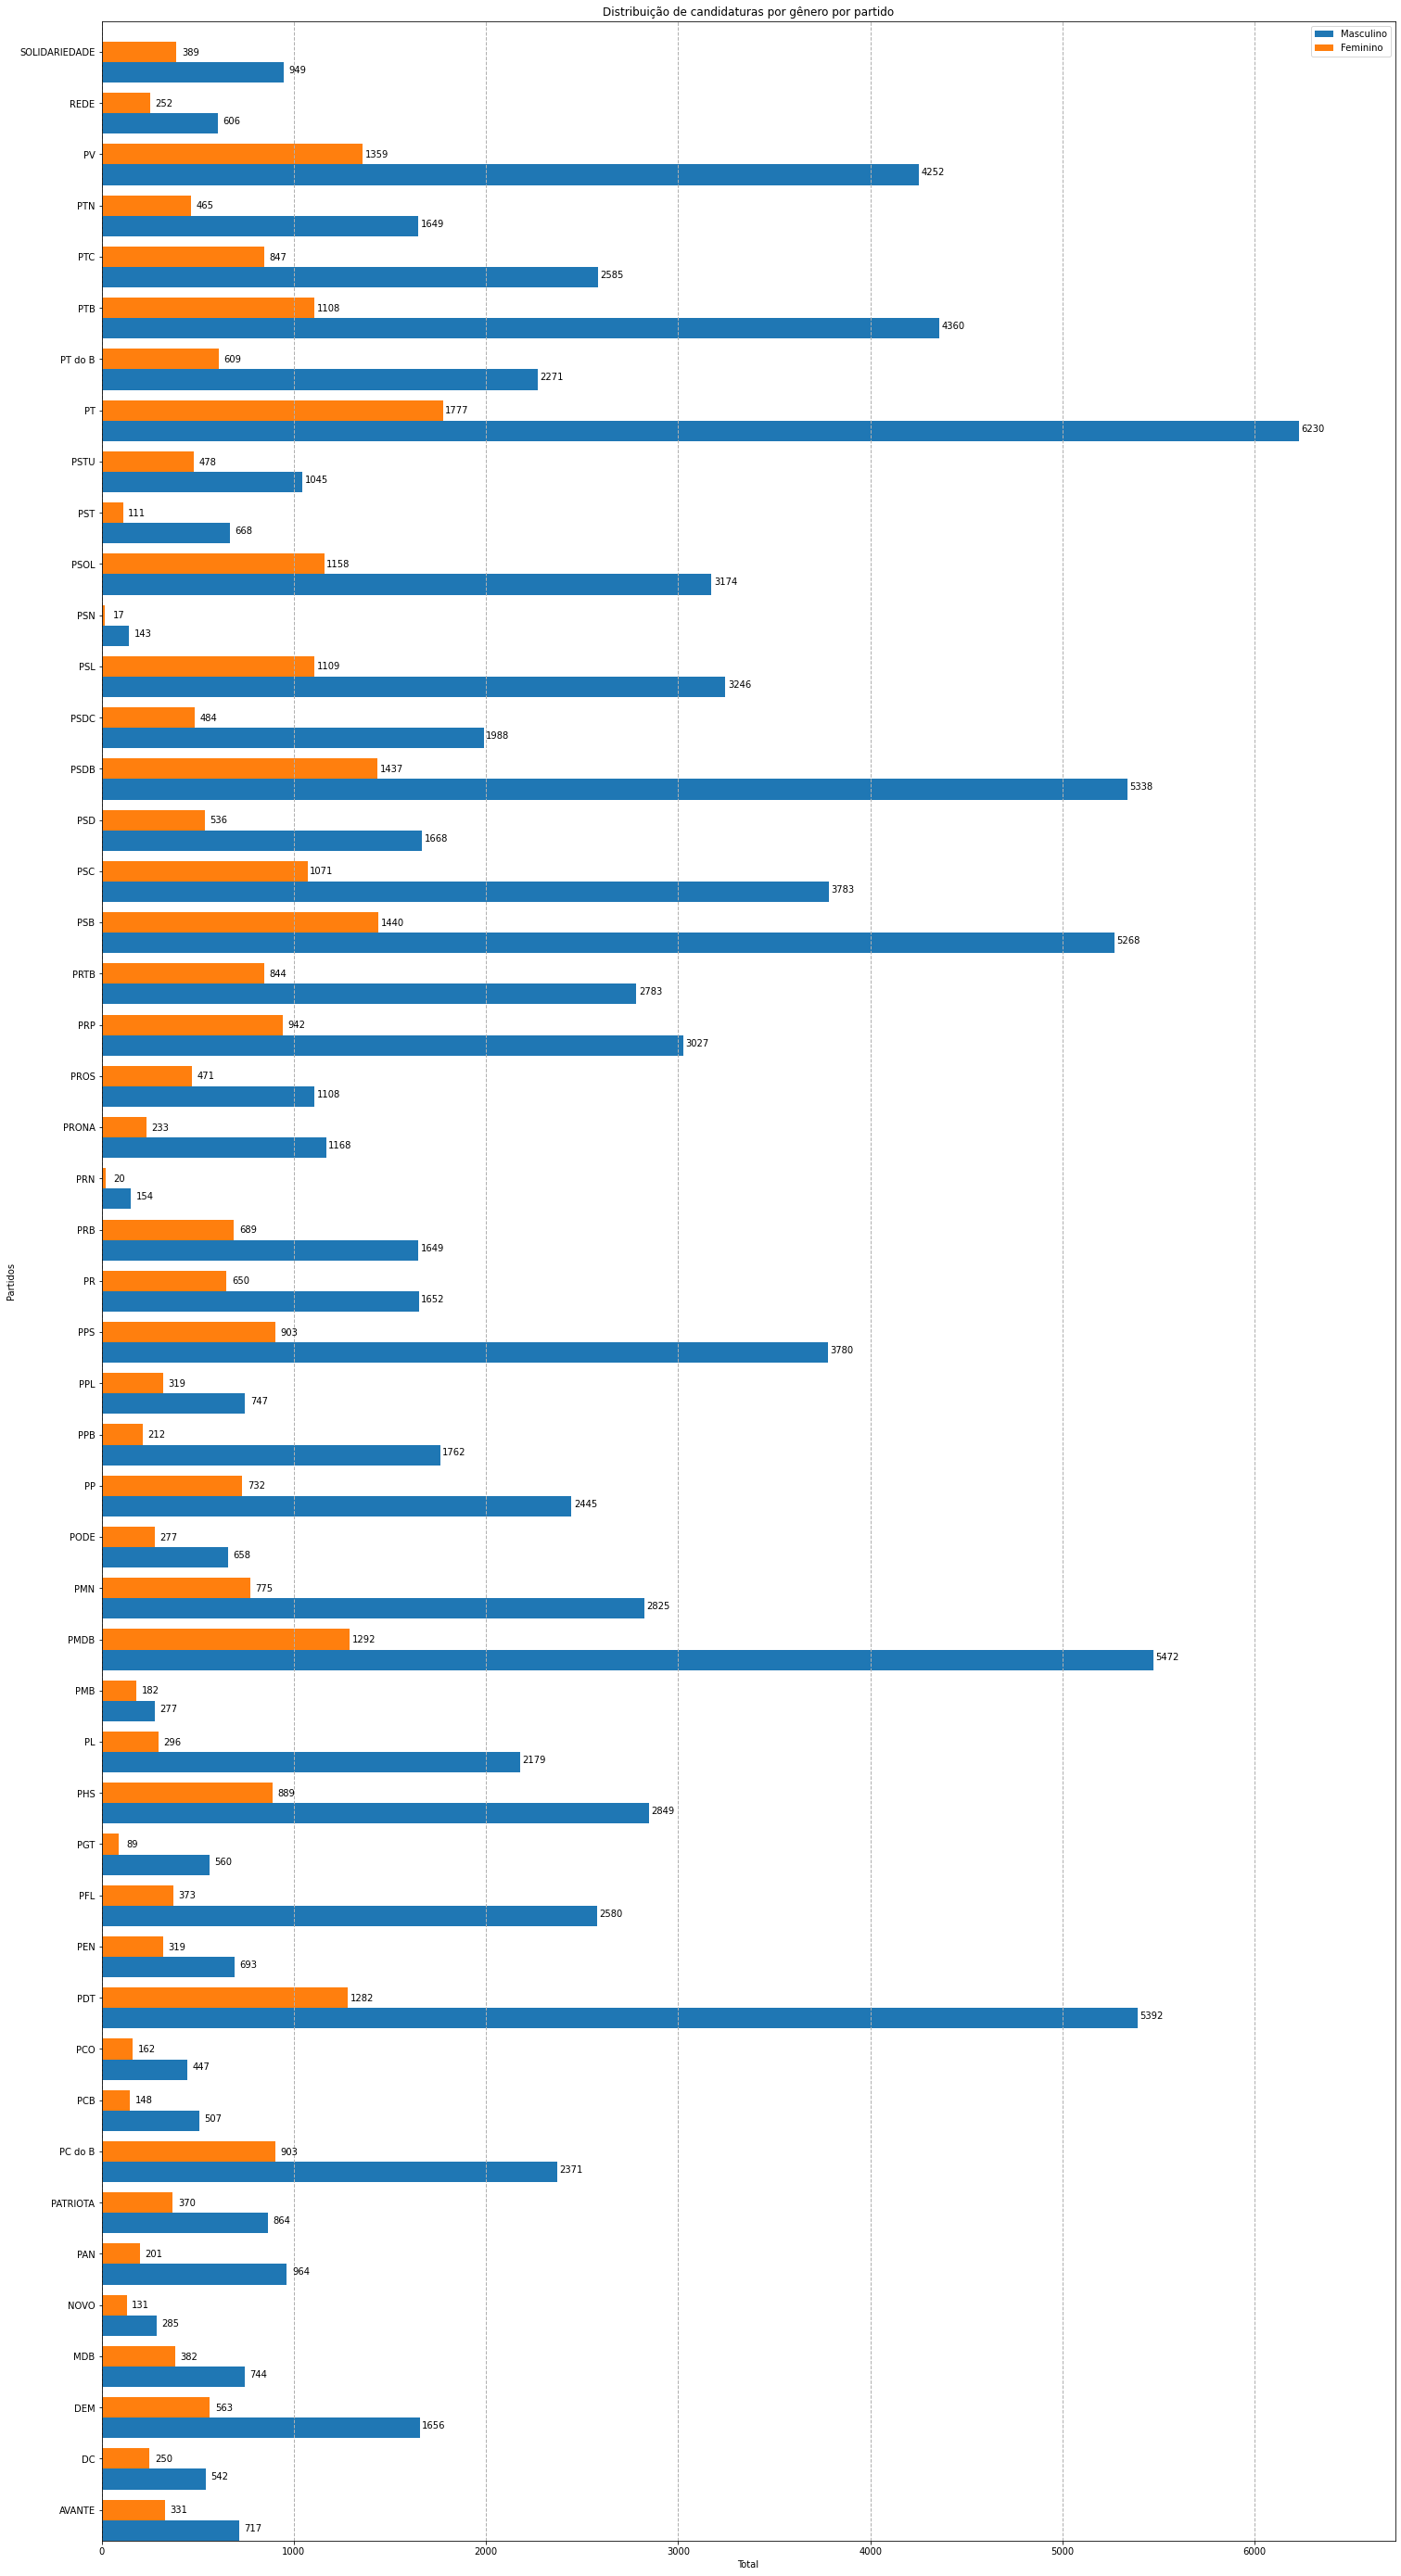

In [522]:
#DEFININDO VALORES DO GRÁFICO
labels = list(df_candidates_by_party['sigla_partido'].values)
men = list(df_candidates_by_party['masculino'].values)
women = list(df_candidates_by_party['feminino'].values)

ind = np.arange(len(df_candidates_by_party))
width = 0.4

fig, ax = plt.subplots(figsize=(25,50))
ax.barh(ind, df_candidates_by_party['masculino'], width, color='tab:blue', label='Masculino')
ax.barh(ind + width, df_candidates_by_party['feminino'], width, color='tab:orange', label='Feminino')

ax.set(yticks=ind + width, yticklabels=df_candidates_by_party['sigla_partido'], ylim=[2*width - 1, len(df_candidates_by_party)])
ax.set_ylabel('Partidos')
ax.set_xlabel('Total')
ax.legend()

def autolabel(rects):
    """Coloca o valor correspondente em cima de cada barra"""
    for rect in rects.patches:
        y_value = rect.get_width()
        x_value = rect.get_y() + rect.get_height() / 4
        space = 1
        
        label = int(y_value)
        
        plt.annotate(label,
                    (y_value, x_value + 0.2),
                    xytext=(15, space),
                    textcoords='offset points',
                    ha='center',
                    va='bottom',
                    size=10)

autolabel(rects1)
autolabel(rects2)

plt.grid(axis='x', linestyle='--', linewidth=1)

plt.xlim(0, max(men)+500)

plt.title('Distribuição de candidaturas por gênero por partido')

plt.show()

Assim finalizamos a parte de visualização dos dados, na seção a seguir fica fácil responder as questões mencionadas no começo dessa análise, não é?

***

# Repostas que podemos extrair
Quando visualizamos como os dados se comportam, fica bem mais legal e intuitivo iterpretar e tomar decisões. Sendo assim, gostaria de levantar duas perguntas que rapidamente podem ser respondidas:
1. Ano que tivemos recorde de candidatas mulheres:
 - De acordo com a visualização, podemos afirmar que o ano em que tivemos mais candidatas foi: 2018
 
2. Partido que mais indicou mulheres como candidatas:
 - De acordo com a visualização, podemos afirmar que o partido que mais indicou candidatas foi: PT com 6230
 
Bom, isso é tudo por agora, pesosal!
Agradeço pela leitura caso tenha chegado até aqui e fique a vontade para me enviar melhorias e comentários.

***

# Referências


- **Base dos Dados** -> https://basedosdados.org/
- **Pandas** -> https://pandas.pydata.org/
- **Matplotlib** -> https://matplotlib.org/